베이스와 cosine Recover의 유사도 점수 비교

In [27]:
import pandas as pd
import csv
import numpy as np
from random import shuffle
import funcs as fc
import decimal
from copy import deepcopy
import math
import seaborn as sns
import math

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))

In [4]:
cosinde_distance_list =  fc.readCSV('./data_distance/distance_CONDITION_cosine.csv', sep='\t')
cityblock_distance_list =  fc.readCSV('./data_distance/distance_CONDITION_cityblock.csv', sep='\t')
euclidean_distance_list =  fc.readCSV('./data_distance/distance_CONDITION_euclidean.csv', sep='\t')
base_dataset = fc.readCSV('./normalized/k3/recover_origin_wc.csv', sep='\t')

In [14]:
cosinde_distance_dict= {data[1]:float(data[2]) for data in cosinde_distance_list}
cityblock_distance_dict= {data[1]:float(data[2]) for data in cityblock_distance_list}
euclidean_distance_dict= {data[1]:float(data[2]) for data in euclidean_distance_list}

In [68]:
def getConGroupingValue(sourceDataSet, distanceDataDict):
    
    minMaxDiffList = []
    for dataRow in sourceDataSet[1:]:
        conGroup = dataRow[2].split(',')
        cosinedGroup = []
        if len(conGroup) > 1:
            for conName in conGroup:
                conName = conName.strip()
                cosValue = distanceDataDict[conName]
                cosinedGroup.append(cosValue)
        
            meanValue = sum(cosinedGroup) / float(len(cosinedGroup))
            meanDiffSum= sum([abs(data - meanValue) for data in cosinedGroup])
#             mndiff = max(cosinedGroup) - min(cosinedGroup)
            minMaxDiffList.append(meanDiffSum)
        
    
    totalMnDiffSum  = sum(minMaxDiffList)
    print("total Min-Max diff Sum: ", round(totalMnDiffSum, 2))
    avrg = round(totalMnDiffSum/len(minMaxDiffList),4)
    print("Min-Max diff Avrg: ", avrg)
    
    return avrg

Cosine
total Min-Max diff Sum:  2441.99
Min-Max diff Avrg:  0.0154
 
total Min-Max diff Sum:  5816.72
Min-Max diff Avrg:  0.0538


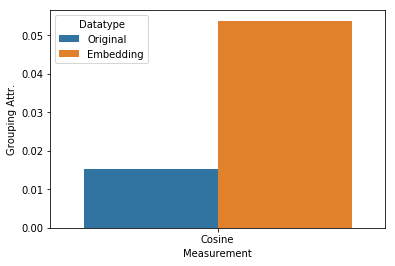

In [72]:
avgBarList = []

cosined_Dataset = fc.readCSV('./normalized/k3/recover_bert_wc_cosine.csv', sep='\t')
print("Cosine")
cosi1 = getConGroupingValue(cosined_Dataset,cosinde_distance_dict)
print(" ")
cosi2 = getConGroupingValue(base_dataset, cosinde_distance_dict)

avgBarList.append(['Cosine', cosi1, 'Original'])
avgBarList.append(['Cosine', cosi2, 'Embedding'])

dataSource_pd = pd.DataFrame(avgBarList, columns=['Measurement', 'Grouping Attr.', 'Datatype'])
sns.barplot(data=dataSource_pd, x='Measurement', y='Grouping Attr.', hue='Datatype')

cityblock
total Min-Max diff Sum:  6430625.31
Min-Max diff Avrg:  40.6377
 
total Min-Max diff Sum:  7223496.59
Min-Max diff Avrg:  66.7945


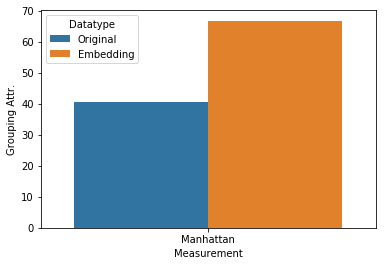

In [73]:
avgBarList = []

cityblock_Dataset = fc.readCSV('./normalized/k3/recover_bert_wc_cityblock.csv', sep='\t')
print("cityblock")
cityb1 = getConGroupingValue(cosined_Dataset, cityblock_distance_dict)
print(" ")
cityb2 = getConGroupingValue(base_dataset, cityblock_distance_dict)


avgBarList.append(['Manhattan', cityb1, 'Original'])
avgBarList.append(['Manhattan', cityb2, 'Embedding'])

dataSource_pd = pd.DataFrame(avgBarList, columns=['Measurement', 'Grouping Attr.', 'Datatype'])
sns.barplot(data=dataSource_pd, x='Measurement', y='Grouping Attr.', hue='Datatype')

euclidean
total Min-Max diff Sum:  285062.81
Min-Max diff Avrg:  1.8014
 
total Min-Max diff Sum:  342954.87
Min-Max diff Avrg:  3.1713


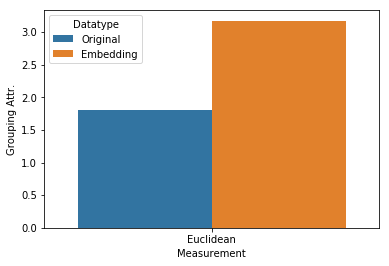

In [74]:
avgBarList = []

euclidean_Dataset = fc.readCSV('./normalized/k3/recover_bert_wc_euclidean.csv', sep='\t')
print("euclidean")
manha1 = getConGroupingValue(cosined_Dataset, euclidean_distance_dict)
print(" ")
manha2 = getConGroupingValue(base_dataset, euclidean_distance_dict)

avgBarList.append(['Euclidean', manha1, 'Original'])
avgBarList.append(['Euclidean', manha2, 'Embedding'])

dataSource_pd = pd.DataFrame(avgBarList, columns=['Measurement', 'Grouping Attr.', 'Datatype'])
sns.barplot(data=dataSource_pd, x='Measurement', y='Grouping Attr.', hue='Datatype')